In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [23]:
# network size N
N = 8
## start out with no infectious individuals
X = np.zeros(N)

## edge matrix 
E = np.array([[0,2],
              [1,2],
              [2,3],
              [2,4],
              [3,6],
              [5,3],
              [3,4],
              [4,7],
              [4,6]])

## number of edges
M = np.shape(E)[0]

## infection rate
b = 1.1

## initialize time
T = 0

# maintain list of times 
times = []

#maintain list of infected individuals
no_infected = []

## choose Tmax
Tmax = 10

## initial condition
X[2] = 1


In [24]:
## code without comments:
while T < Tmax:
    no_infected.append(sum(X))
    times.append(T)
    T += np.random.exponential(scale = (N + b*M)**(-1), size = 1)[0]
    if np.random.random() < N/(N + b*M):
        X[np.random.randint(0, N)] = 0
    else:
        random_edge = np.random.randint(0, M)
        X[E[random_edge][0]] = X[E[random_edge][1]] = 1*(X[E[random_edge][0]] or X[E[random_edge][1]])


In [ ]:
while T < Tmax:
    ## difference: the np.sum() operation is faster on arrays, slower on lists; here we are summing elements of a list so better to use Python sum() 
    no_infected.append(sum(X))
    times.append(T)
    T += np.random.exponential(scale = (N + b*M)**(-1), size = 1)[0]
    if np.random.random() < N/(N + b*M):
        ## difference: rather than random.choice() use randint, which will avoid having to create an array first.
        X[np.random.randint(0, N)] = 0
    else:
        ## difference: rather than random.choice() use randint, which will avoid having to create an array first.
        random_edge = np.random.randint(0, M)
        X[E[random_edge][0]] = X[E[random_edge][1]] = 1*(X[E[random_edge][0]] or X[E[random_edge][1]])


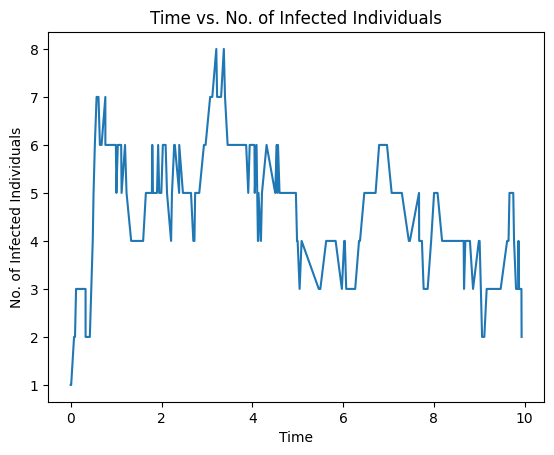

In [25]:
plt.plot(times, no_infected)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
